In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_69232/949127318.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

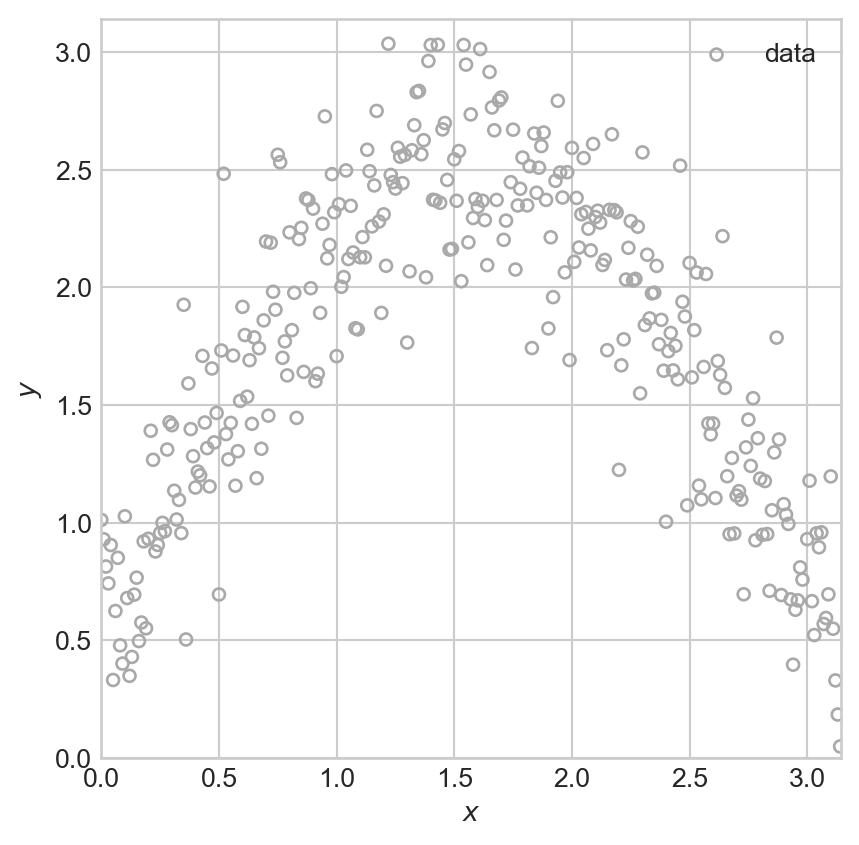

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1]


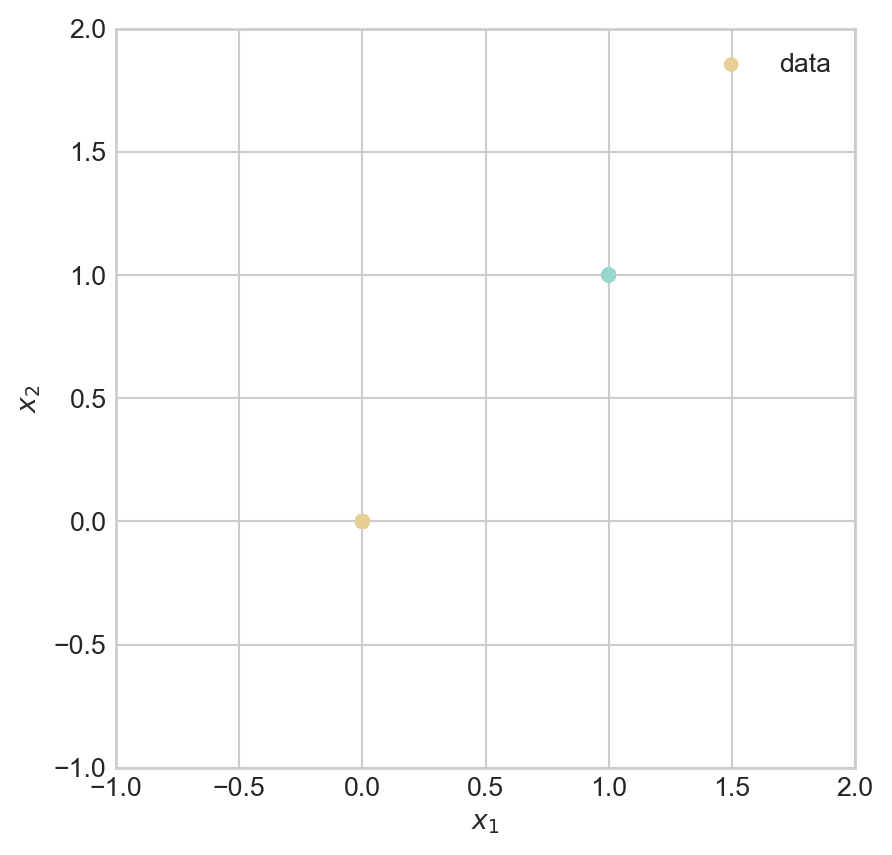

In [2]:
#| label: fig-examples
#| fig-cap: Examples of data with visualizable patterns.
#| fig-subcap:
#|   - Example data in which we can seek a pattern in the value of $y$ based on the value of $x$. This task is called  **regression**.
#|   - 'Example data in which we can seek a pattern in the **category** of a data point (represented by color) based on the value of two variables, $x_1$ and $x_2$. This task is called **classification.**'
#| layout-ncol: 2

import torch as tt
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

def plot_fig(pattern = False):

    # panel 1: regression

    noise = 0.3

    x = np.arange(0, np.pi, 0.01)
    y = 2*np.sin(x) + 0.5
    y_noise = y + np.random.normal(0.0, noise, size = (len(x),))

    plt.scatter(x, y_noise, s = 20,  facecolors='none', edgecolors = "darkgrey", label = "data")
    if pattern: 
        plt.plot(x, y, label = "pattern", linestyle = "--", color = "black", zorder = 10)
    plt.gca().set(xlabel = r"$x$", ylabel = r"$y$")
    plt.gca().set_xlim(-0, np.pi)
    plt.gca().set_ylim(-0, np.pi)
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

    # panel 2: classification

    noise = 0.2
    n_points = 300
    x = np.array([[0, 1], [0, 1]])
    x = np.tile(x, int(n_points/2))
    # x = x + np.random.normal(0.0, noise, size = (x.shape[0], n_points))
    y = np.array([0, 1])
    y = np.tile(y, int(n_points/2))
    print(y)

    plt.scatter(x[0,:], x[1,:], s = 20,  c = y, facecolors = "none", cmap = "BrBG", label = "data", vmin = -1, vmax = 2)

    if pattern: 
        plt.plot([-0.5, 1.5], [1.5, -0.5], label = "pattern", linestyle = "--", color = "black", zorder = 10)
    plt.legend()
    plt.gca().set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    plt.gca().set_xlim(-1.0, 2.0)
    plt.gca().set_ylim(-1.0, 2.0)
    plt.gca().set_aspect('equal')
    plt.show()

plot_fig()

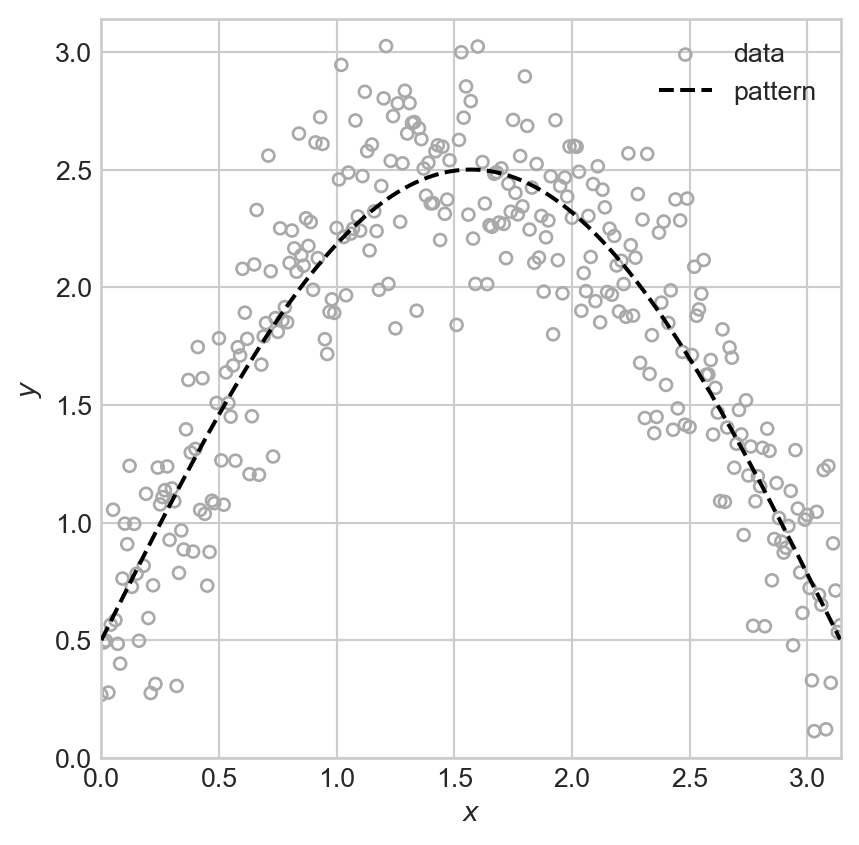

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1]


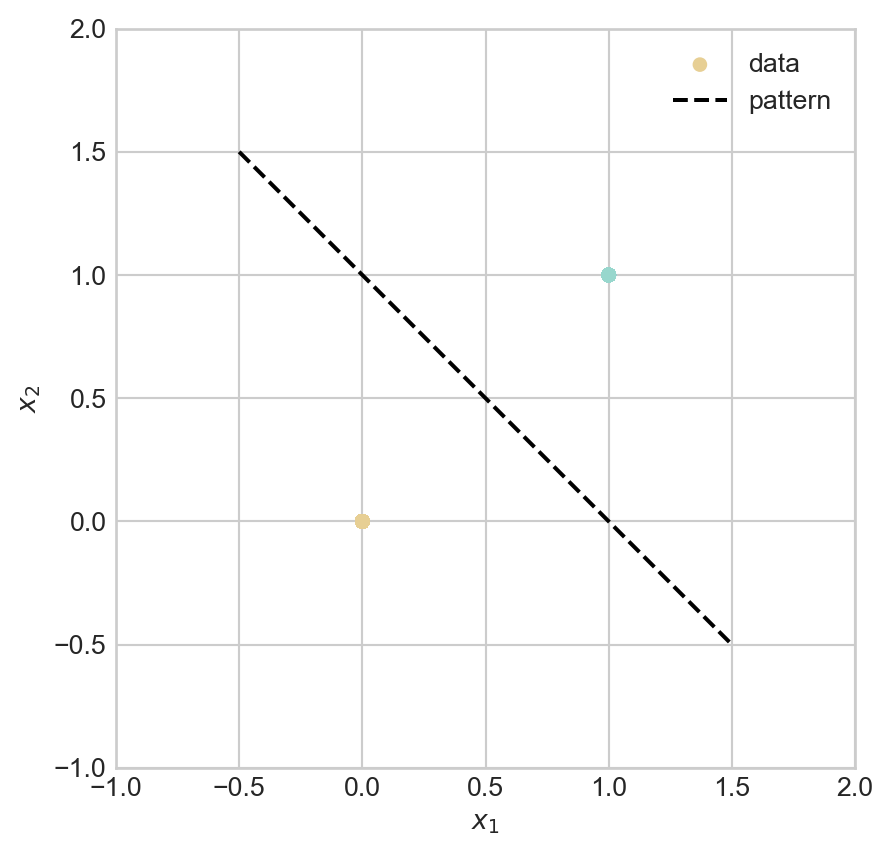

In [3]:
#| label: fig-examples-with-patterns
#| fig-cap: Examples of patterns in data.
#| fig-subcap:
#|   - 'As above, with a plot of the function $f(x) = 2\sin{x} + \frac{1}{2}$.'
#|   - 'As above, with a plot of the function $g(x_1) = 1 - x_1$. This plot is the same as the affine subspace defined by the equation $x_1 + x_2 = 1$.'
#| layout-ncol: 2
plot_fig(pattern = True)

In [4]:
#| code-fold: false

url = "../data/credit-risk/credit_risk_dataset.csv"

In [5]:
#| code-fold: false

#---
import pandas as pd
df = pd.read_csv(url)
df = df.head(1000).copy()
#---

In [6]:
#| code-fold: false

#---
df
#---

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,46610,RENT,6.0,DEBTCONSOLIDATION,B,18000,10.71,1,0.39,N,3
996,24,48000,RENT,5.0,PERSONAL,A,18000,6.54,1,0.38,N,2
997,23,24000,OWN,0.0,PERSONAL,A,8000,5.79,0,0.33,N,3
998,25,55000,RENT,2.0,EDUCATION,C,18000,12.84,1,0.33,N,2


In [7]:
df["loan_status"].mean()

0.553

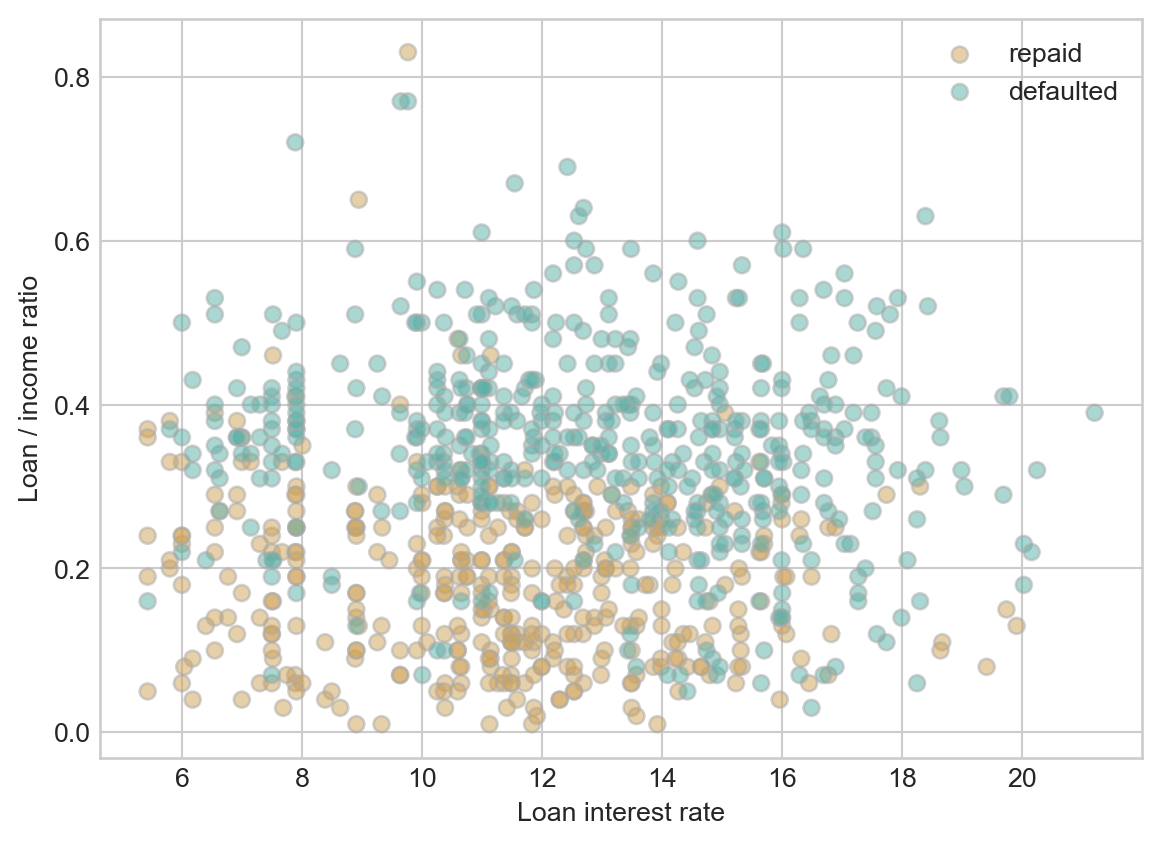

In [8]:
#| code-fold: false

def scatter_data(ax, df):

    for i in range(2):
        to_plot = df[df["loan_status"] == i]
        ax.scatter(to_plot["loan_int_rate"], to_plot["loan_percent_income"], c = to_plot["loan_status"], vmin = -0.5, vmax = 1.5, facecolors='none', edgecolors = "darkgrey", alpha = 0.5, label = f"{['repaid', 'defaulted'][i]}", cmap = "BrBG")
        ax.legend()
        ax.set(xlabel = "Loan interest rate", ylabel = "Loan / income ratio")

df = df.head(1000)
fig, ax = plt.subplots(1, 1)
scatter_data(ax, df)

In [9]:
import numpy as np

def plot_score(ax, w, df, contour = False):

    x_col = "loan_int_rate"
    y_col = "loan_percent_income"

    x_min, x_max = df[x_col].min(), df[x_col].max()
    y_min, y_max = df[y_col].min(), df[y_col].max()

    X = np.linspace(x_min, x_max, 101)
    Y = np.linspace(y_min, y_max, 101)

    X, Y = np.meshgrid(X, Y)
    S = w[0]*X + w[1]*Y + w[2]

    ticks = np.linspace(0, 101, 6)
    # x_tick_labels = np.round(np.linspace(x_min, x_max, 6), 2)
    # y_tick_labels = np.round(np.linspace(y_min, y_max, 6), 2)

    im = ax.contourf(X, Y, S, origin = "lower", extent = (x_min, x_max, y_min, y_max),  cmap = "BrBG", vmin = 2*S.min() - S.max(), vmax = 2*S.max() - S.min())
    
    ax.set(xlabel = "Loan interest rate", ylabel = "Loan / income ratio")
    
    cbar = plt.colorbar(im, )
    cbar.set_label("Predicted score")

def score_viz(w, df):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4)) 
    plot_score(ax[0], w, df, contour = True)
    plot_score(ax[1], w, df, contour = True)
    scatter_data(ax[1], df)
    plt.tight_layout()

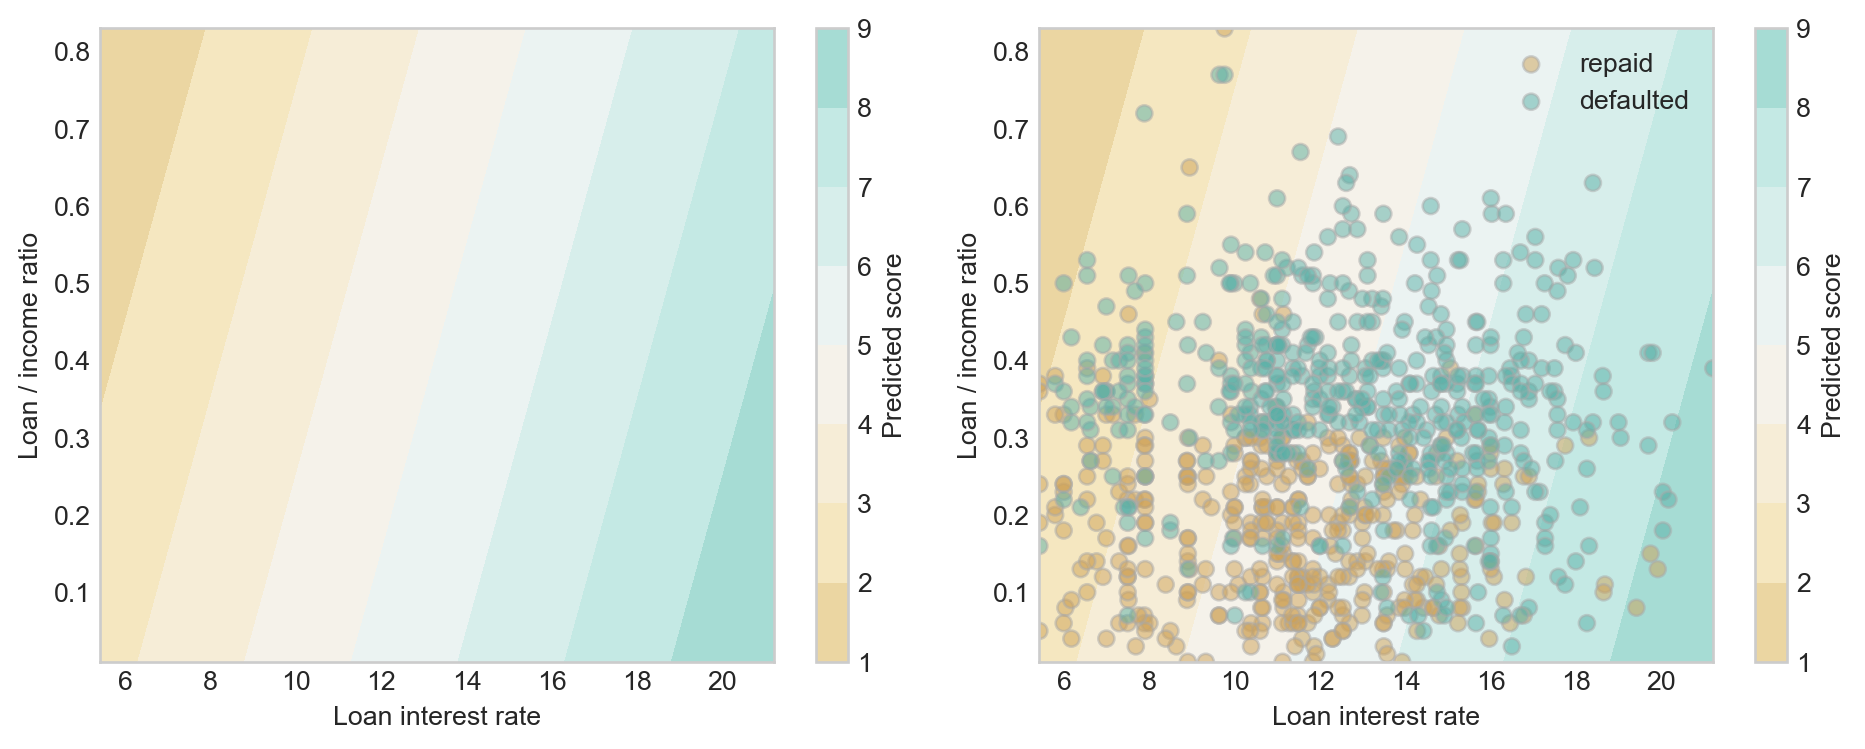

In [10]:
w = np.array([0.4, -2, 0.5])
score_viz(w, df)

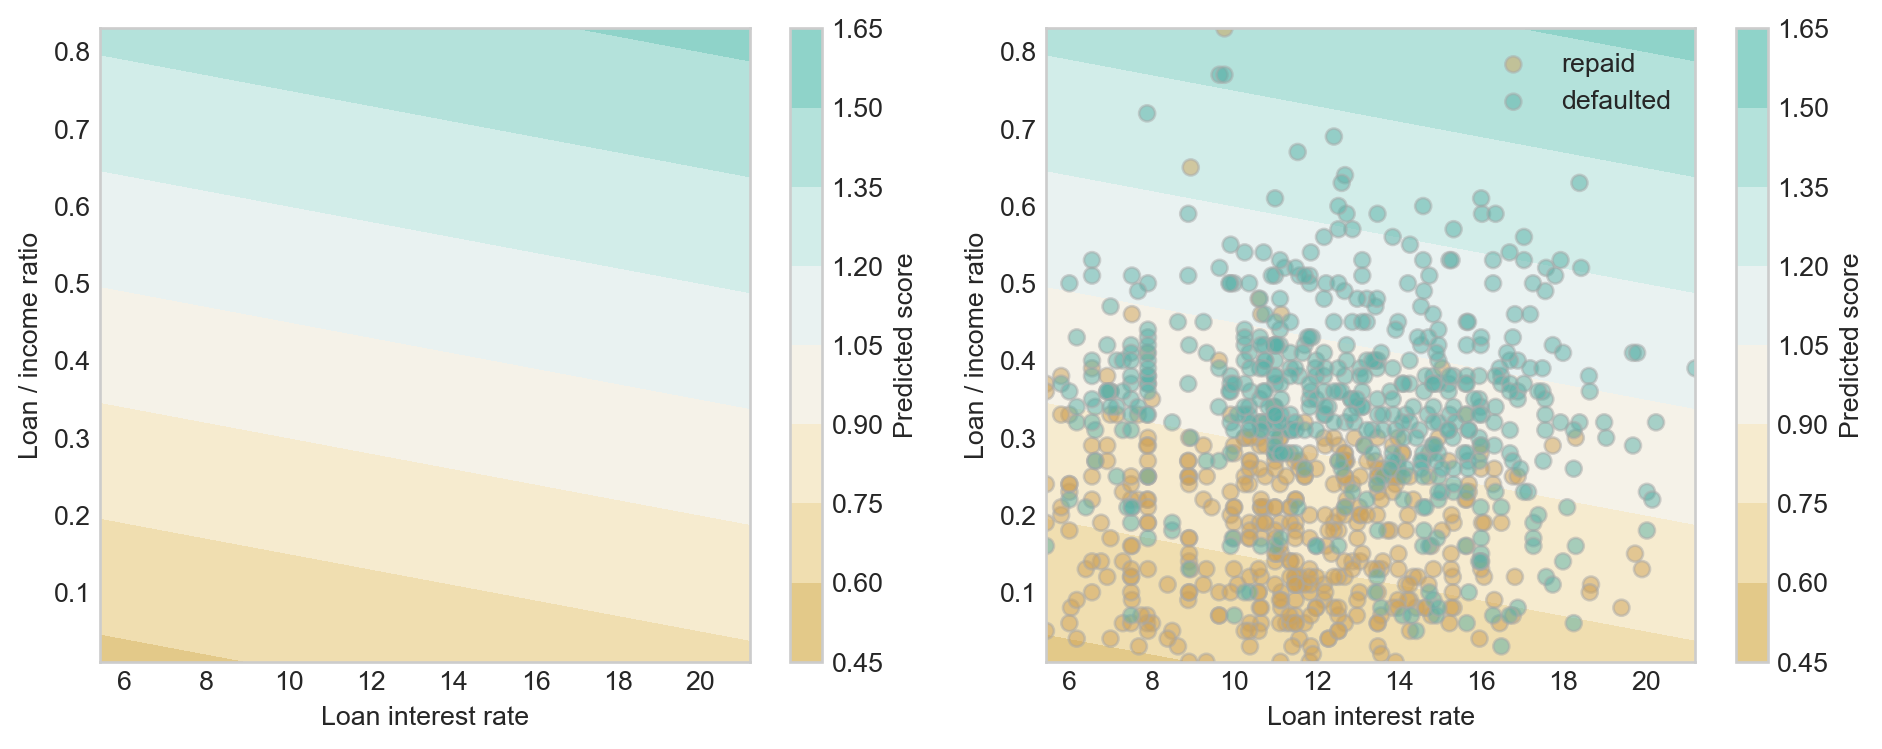

In [11]:
w = np.array([0.01, 1, 0.5])
score_viz(w, df)

In [12]:
def plot_threshold(w, ax, df, t):
    x_col = "loan_int_rate"
    x = df[x_col]
    x_min = x.min()
    x_max = x.max()
    x = np.linspace(x_min, x_max, 2)

    y = (t - w[2] - w[0]*x)/w[1]
    ax.plot(x, y, color = "black", linestyle = "--")

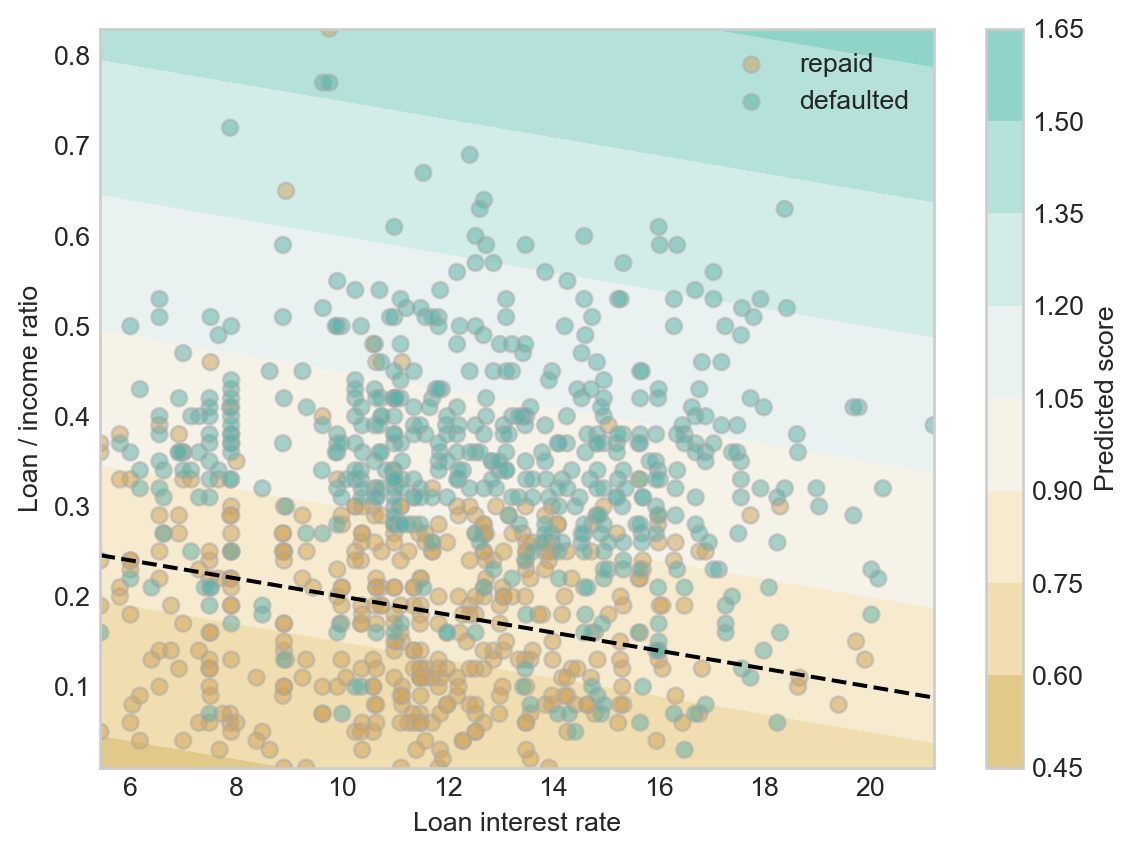

In [13]:
threshold = 0.8
fig, ax = plt.subplots(1, 1)
plot_score(ax, w, df, contour = True)
scatter_data(ax, df)
plot_threshold(w, ax, df, threshold)

In [14]:
def predict(w, threshold, df):
    scores = w[0]*df["loan_int_rate"] + w[1]*df["loan_percent_income"] + w[2]  
    return 1*(scores > threshold)

df["decision"] = predict(w, threshold, df)

/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_69232/622977083.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
(df["decision"] == df["loan_status"]).mean()

0.708